# Regresión logística

## Carga y análisis de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JASDataCTG/Diplomado-ML/main/Modulo%202/Datasets/casas.csv', header = 0)

In [3]:
df.head()

,precio,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p-pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque,Vendida
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,SI,5.480,11.1920,Rio,23,SI,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lago,42,SI,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,Ninguno,38,SI,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,SI,9.268,11.2672,Lago,45,SI,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lago,55,SI,0.039474,0


In [4]:
df.shape

(506, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       506 non-null    float64
 1   area_resid   506 non-null    float64
 2   cal_aire     506 non-null    float64
 3   num_hab      506 non-null    float64
 4   edad         506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   prof_mil     506 non-null    float64
 10  p-pobreza    506 non-null    float64
 11  aeropuerto   506 non-null    object 
 12  n_cam_hos    498 non-null    float64
 13  n_hab_hotel  506 non-null    float64
 14  cuerpo_agua  506 non-null    object 
 15  lluvia_ano   506 non-null    int64  
 16  ter_bus      506 non-null    object 
 17  parque       506 non-null    float64
 18  Vendida      506 non-null    int64  
dtypes: float

In [6]:
df.describe()

,precio,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


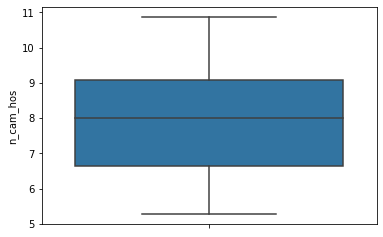

In [7]:
sns.boxplot(y = 'n_cam_hos', data = df)

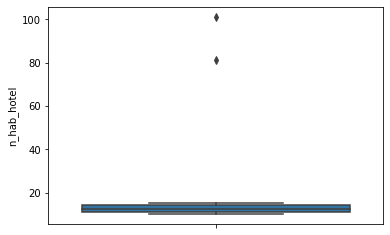

In [8]:
sns.boxplot(y = df['n_hab_hotel'])

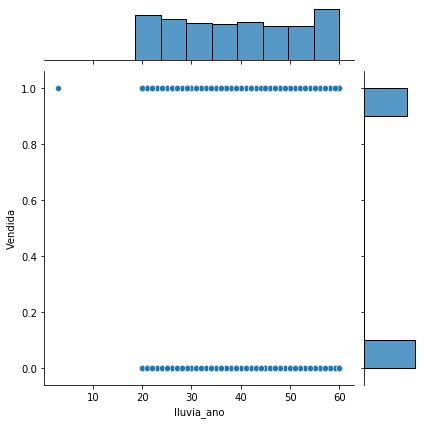

In [9]:
sns.jointplot(x = df['lluvia_ano'], y = df['Vendida'])

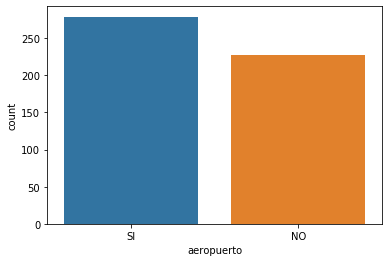

In [10]:
sns.countplot(x = df['aeropuerto'])

In [11]:
df.groupby(by = 'Vendida')['area_resid'].mean()

Vendida
0    40.984094
1    41.320000
Name: area_resid, dtype: float64

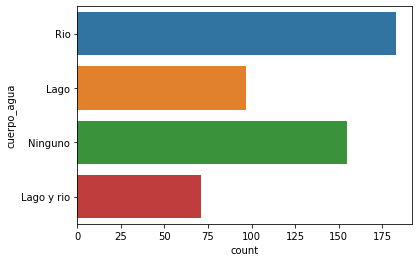

In [12]:
sns.countplot(y = df['cuerpo_agua'])

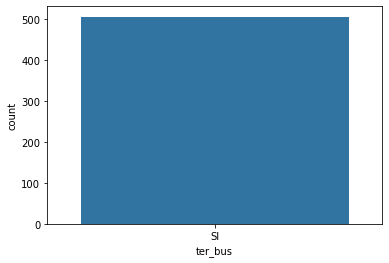

In [13]:
sns.countplot(x = df['ter_bus'])

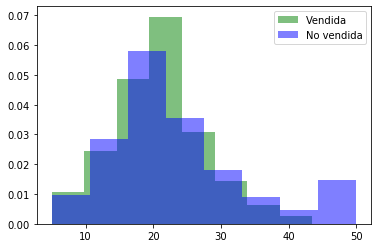

In [14]:
x1 = df.precio[df.Vendida == 1]
x2 = df.precio[df.Vendida == 0]#df[df.Vendida == 0]['precio']

kwargs = dict(alpha = 0.5, bins = 8, density = True, stacked = True)
## columnas, colorear densidad, stacked es apilamiento

plt.hist(x1, **kwargs, color = 'g', label = 'Vendida')
plt.hist(x2, **kwargs, color = 'b', label = 'No vendida')
plt.legend()

## Tratamiento de valores extremos

In [15]:
np.percentile(df.n_hab_hotel, [99])[0]

15.399519999999999

In [16]:
lim_sup = np.percentile(df.n_hab_hotel, [99])[0]

In [17]:
df[df.n_hab_hotel > lim_sup]

,precio,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p-pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque,Vendida
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,Ninguno,38,SI,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,SI,8.300,15.40,Rio,37,SI,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,SI,8.900,15.40,Rio,51,SI,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,SI,8.000,15.40,Ninguno,42,SI,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,SI,6.700,15.40,Rio,58,SI,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lago,29,SI,0.063344,0


In [18]:
df.n_hab_hotel[df.n_hab_hotel > 3 * lim_sup] = 3 * lim_sup

<ipython-input-18-dea329e9daba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hab_hotel[df.n_hab_hotel > 3 * lim_sup] = 3 * lim_sup


In [19]:
np.percentile(df.lluvia_ano, [0.3])[0]

20.0

In [20]:
lim_inf = np.percentile(df.lluvia_ano, [0.3])[0]

In [21]:
df[df.lluvia_ano < lim_inf]

,precio,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p-pobreza,aeropuerto,n_cam_hos,n_hab_hotel,cuerpo_agua,lluvia_ano,ter_bus,parque,Vendida
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,SI,7.562,10.2248,Ninguno,3,SI,0.044019,1


In [22]:
df.lluvia_ano[df.lluvia_ano < 0.3 * lim_inf] = 0.3 * lim_inf

<ipython-input-22-bfc4b8993ce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lluvia_ano[df.lluvia_ano < 0.3 * lim_inf] = 0.3 * lim_inf


In [23]:
df.describe()

,precio,area_resid,cal_aire,num_hab,edad,dist1,dist2,dist3,dist4,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


In [24]:
df.n_cam_hos = df.n_cam_hos.fillna(df.n_cam_hos.mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       506 non-null    float64
 1   area_resid   506 non-null    float64
 2   cal_aire     506 non-null    float64
 3   num_hab      506 non-null    float64
 4   edad         506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   prof_mil     506 non-null    float64
 10  p-pobreza    506 non-null    float64
 11  aeropuerto   506 non-null    object 
 12  n_cam_hos    506 non-null    float64
 13  n_hab_hotel  506 non-null    float64
 14  cuerpo_agua  506 non-null    object 
 15  lluvia_ano   506 non-null    int64  
 16  ter_bus      506 non-null    object 
 17  parque       506 non-null    float64
 18  Vendida      506 non-null    int64  
dtypes: float

In [26]:
df['prom_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4) / 4

In [27]:
del df['dist1']

In [28]:
del df['dist2']

In [29]:
del df['dist3']

In [30]:
del df['dist4']

In [31]:
del df['ter_bus']

In [32]:
df = pd.get_dummies(df)

In [33]:
df.head()

,precio,area_resid,cal_aire,num_hab,edad,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida,prom_dist,aeropuerto_NO,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y rio,cuerpo_agua_Ninguno,cuerpo_agua_Rio
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,1,0,1,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,1,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,0,1,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,1,0,1,0,0,0


In [34]:
del df['aeropuerto_NO']

In [35]:
del df['cuerpo_agua_Ninguno']

In [36]:
df.head()

,precio,area_resid,cal_aire,num_hab,edad,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida,prom_dist,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y rio,cuerpo_agua_Rio
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


In [37]:
df.to_csv('Data/DataReg.csv', header = True, index = False)

## Regresión logística
Dado que la función lineal no se puede ajustar a variables catagóricas binarias (0, 1), se hace necesario utilizar la función sigmoide $\sigma(y)$:

$$\large{\sigma(y)=\frac{1}{1+e^{-y}}}$$

Cuando $y$ toma valores positivos muy grandes, $e^{-y}$ toma volores muy cercanos a cero, lo que ocasiona que la función $\sigma(y)$ tome valores muy cercanos a $1$. Por el contrario, cuando $y$ toma valores negativos muy grandes, $e^{-y}$ toma volores muy cercanos a $+\infty$, lo que ocasiona que la función $\sigma(y)$ tome valores muy cercanos a $0$

Probabilidad de $y$ dado $X$:
$$
\large{P(y=1|X=x)=\frac{e^{\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p}}}{1+e^{-(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p})}}}
$$

La regresión logística calcula los logaritmos de las probabilidades de cada variable para transformarlas en 0 o 1, usando un umbral de decisión.

Se conoce como probabilidad de *odds* a la razón entre la probabilidad de aciertos y desaciertos:

$$
odds = \frac{P(y=1|X;\theta)}{P(y=0|X;\theta)}
$$

entonces,

$$
\ln{\frac{P(y=1|X;\theta)}{P(y=0|X;\theta)}}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{3}+...+\theta_{p}x_{p}
$$

In [38]:
# Se utiliza doble corchete porque para el modelo, X debe ser un dataframe y por defecto una sola columna es un
# tipo de dato Serie
X = df[['precio']]

In [39]:
X.head()

,precio
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [40]:
# El modelo requiere la variable predicha como una serie, por eso no se aplican dobles corchetes
y = df['Vendida']

In [41]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Vendida, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [43]:
# Crear modelo de regresión logística
reg_log_simple = LogisticRegression()

In [44]:
# Entrenar el modelo
reg_log_simple.fit(X, y)

LogisticRegression()

In [45]:
# Obener el valor de theta(1)
reg_log_simple.coef_

array([[-0.03571865]])

In [46]:
# Obtener el valor de theta(0)
reg_log_simple.intercept_

array([0.61477516])

In [47]:
# Importar el modulo statsmodel para poder crear la constante que requiere el modelo Logit
import statsmodels.api as sn

In [48]:
const_X = sn.add_constant(X)
const_X

/home/javier/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,precio
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2
...,...,...
501,1.0,22.4
502,1.0,20.6
503,1.0,23.9
504,1.0,22.0


In [49]:
# Importar el modulo para trabajar con variables discretas con Logit
import statsmodels.discrete.discrete_model as sm

In [50]:
# Entrenar y ajustar el modelo a los datos de entrada
logit = sm.Logit(y, const_X).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [51]:
# Obtener el resumen del modelo
logit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 Aug 2021   Pseudo R-squ.:                 0.01788
Time:                        15:15:31   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
precio        -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

In [52]:
# Realizar una predicción de ejemplo
np.floor(logit.predict([1,-300])[0])

0.0

## Gráfica del modelo de regresión logística simple

In [53]:
# Crear los puntos necesarios de la variable predicha desarrollar la gráfica

grilla_X = np.linspace(
    start = -100, # min(df.precio),
    stop = 100, # max(df.precio),
    num = 500
).reshape(-1,1) # reshape -> una columna y determina cuantas columnas debe poner

# Agregar la constante para poder desarrollar la predicción por el modelo Logit
grilla_X = sn.add_constant(grilla_X, prepend = True)

# Desarrollar la predicción
prediccion = logit.predict(exog = grilla_X)

In [54]:
grilla_X.shape # El resultado es un vector de 500 x 2

(500, 2)

Text(0.5, 0, 'Precio de venta')

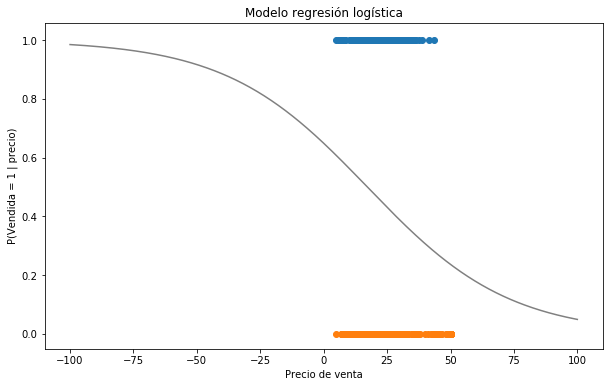

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
# Nube de puntos para cuando la propiedad es vendida
ax.scatter(
    x = df[['precio']][(y==1)].to_numpy().flatten(), y = df[['Vendida']][y==1].to_numpy().flatten()
)
# to_numpy pasa array y flattern a que sea unidimensional

# Nube de puntos para el caso en que la propiedad no es vendida
ax.scatter(
    x = df[['precio']][(y==0)].to_numpy().flatten(), y = df[['Vendida']][y==0].to_numpy().flatten()
)

ax.plot(grilla_X[:500, 1], prediccion, color = "gray") # Segunda columna de la grilla
ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(Vendida = 1 | precio)")
ax.set_xlabel("Precio de venta")

In [56]:
#prediccion